In [7]:
# 1. Import pandas
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV



# 2. Load the saved CSVs
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

# 4. Verify shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(22449, 31)
(7483, 31)
(22449, 1)
(7483, 1)


In [9]:
# One iteration testing
# svm_clf = SVC(
#     kernel='linear',       # radial basis function kernel
#     C=1.0,              # regularization parameter; try grid‐search to tune
#     gamma='scale',      # 'scale' is 1 / (n_features * X.var())
#     probability=True,   # enable .predict_proba() for ROC/AUC
#     random_state=42
# )
# svm_clf.fit(X_train, y_train)

# # 3) Make predictions
# y_pred    = svm_clf.predict(X_test)
# y_proba   = svm_clf.predict_proba(X_test)[:,1]

svm = SVC(kernel='rbf', probability=True, random_state=42)

param_grid = {
    'C':     [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10]
}


grid = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=2
)



grid.fit(X_train, y_train)

print("Best CV ROC-AUC:", grid.best_score_)
print("Best params:   ", grid.best_params_)

# Evaluate on test
best_svm = grid.best_estimator_
y_pred = best_svm.predict_proba(X_test)[:,1]
print("Test ROC-AUC:", roc_auc_score(y_test, y_pred))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

[CV] END ..................................C=0.1, gamma=0.01; total time= 1.9min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..................................C=0.1, gamma=0.01; total time= 1.9min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..................................C=0.1, gamma=0.01; total time= 1.9min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..................................C=0.1, gamma=0.01; total time= 1.9min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..................................C=0.1, gamma=0.01; total time= 1.9min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...................................C=0.1, gamma=0.1; total time= 2.2min
[CV] END ...................................C=0.1, gamma=0.1; total time= 2.2min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...................................C=0.1, gamma=0.1; total time= 2.2min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...................................C=0.1, gamma=0.1; total time= 2.2min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...................................C=0.1, gamma=0.1; total time= 2.3min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................................C=0.1, gamma=1; total time= 5.3min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................................C=0.1, gamma=1; total time= 5.2min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................................C=0.1, gamma=1; total time= 5.5min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................................C=0.1, gamma=1; total time= 5.6min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................................C=0.1, gamma=1; total time= 5.3min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....................................C=0.1, gamma=10; total time= 7.2min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....................................C=1, gamma=0.01; total time= 2.1min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....................................C=1, gamma=0.01; total time= 2.1min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....................................C=1, gamma=0.01; total time= 2.2min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....................................C=0.1, gamma=10; total time= 7.4min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....................................C=0.1, gamma=10; total time= 7.4min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....................................C=1, gamma=0.01; total time= 2.3min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....................................C=1, gamma=0.01; total time= 2.3min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................................C=1, gamma=0.1; total time= 2.8min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................................C=1, gamma=0.1; total time= 2.9min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................................C=1, gamma=0.1; total time= 2.9min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................................C=1, gamma=0.1; total time= 2.9min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................................C=1, gamma=0.1; total time= 2.8min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....................................C=0.1, gamma=10; total time= 7.6min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....................................C=0.1, gamma=10; total time= 7.5min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................................C=1, gamma=1; total time= 6.2min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................................C=1, gamma=1; total time= 6.4min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................................C=1, gamma=1; total time= 6.4min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................................C=1, gamma=1; total time= 6.6min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................................C=1, gamma=1; total time= 6.8min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...................................C=10, gamma=0.01; total time= 3.0min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...................................C=10, gamma=0.01; total time= 2.9min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...................................C=10, gamma=0.01; total time= 2.9min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................................C=1, gamma=10; total time= 9.9min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................................C=1, gamma=10; total time= 9.8min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................................C=1, gamma=10; total time= 9.8min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...................................C=10, gamma=0.01; total time= 2.8min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...................................C=10, gamma=0.01; total time= 2.3min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................................C=1, gamma=10; total time= 9.8min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................................C=1, gamma=10; total time= 9.8min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....................................C=10, gamma=0.1; total time= 4.6min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....................................C=10, gamma=0.1; total time= 4.7min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....................................C=10, gamma=0.1; total time= 4.6min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....................................C=10, gamma=0.1; total time= 4.8min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....................................C=10, gamma=0.1; total time= 4.8min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................................C=10, gamma=1; total time= 8.0min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................................C=10, gamma=1; total time= 8.6min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................................C=10, gamma=1; total time= 8.8min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................................C=10, gamma=1; total time= 8.9min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................................C=10, gamma=1; total time= 8.9min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................................C=10, gamma=10; total time=13.4min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................................C=10, gamma=10; total time=13.5min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..................................C=100, gamma=0.01; total time= 5.4min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................................C=10, gamma=10; total time=13.4min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..................................C=100, gamma=0.01; total time= 5.5min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..................................C=100, gamma=0.01; total time= 5.3min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..................................C=100, gamma=0.01; total time= 4.5min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..................................C=100, gamma=0.01; total time= 4.7min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................................C=10, gamma=10; total time=13.4min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................................C=10, gamma=10; total time=13.2min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...................................C=100, gamma=0.1; total time= 9.2min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...................................C=100, gamma=0.1; total time= 9.2min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...................................C=100, gamma=0.1; total time= 9.8min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...................................C=100, gamma=0.1; total time= 9.6min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...................................C=100, gamma=0.1; total time= 9.9min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................................C=100, gamma=1; total time=10.4min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................................C=100, gamma=1; total time=10.4min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................................C=100, gamma=1; total time=10.4min
[CV] END .....................................C=100, gamma=1; total time= 9.8min
[CV] END .....................................C=100, gamma=1; total time=10.0min
[CV] END ....................................C=100, gamma=10; total time=13.8min
[CV] END ....................................C=100, gamma=10; total time=13.8min
[CV] END ....................................C=100, gamma=10; total time=11.6min
[CV] END ....................................C=100, gamma=10; total time=10.9min
[CV] END ....................................C=100, gamma=10; total time=10.8min


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best CV ROC-AUC: 0.8198139277352559
Best params:    {'C': 10, 'gamma': 0.01}
Test ROC-AUC: 0.7155943333694628


In [12]:
# 1. Grab the cv_results_ as a DataFrame
results = pd.DataFrame(grid.cv_results_)

# 2. Select and sort the columns you care about
report = results[[
    'param_C',
    'param_gamma',
    'mean_test_score',
    'std_test_score',
    'rank_test_score'
]].sort_values('rank_test_score')

# 3. Print the full table
print(report.to_string(index=False))
report.to_csv('grid_search_summary.csv', index=False)

 param_C  param_gamma  mean_test_score  std_test_score  rank_test_score
    10.0         0.01         0.819814        0.005148                1
     1.0         0.01         0.819190        0.005449                2
   100.0         0.01         0.815894        0.004771                3
     1.0         0.10         0.815181        0.003507                4
     0.1         0.10         0.811573        0.004988                5
     0.1         0.01         0.810326        0.006405                6
    10.0         0.10         0.801506        0.002454                7
     1.0         1.00         0.789434        0.001893                8
     1.0        10.00         0.777986        0.000772                9
     0.1         1.00         0.777807        0.000098               10
     0.1        10.00         0.777807        0.000098               10
   100.0         0.10         0.772908        0.006247               12
    10.0         1.00         0.768987        0.004372          

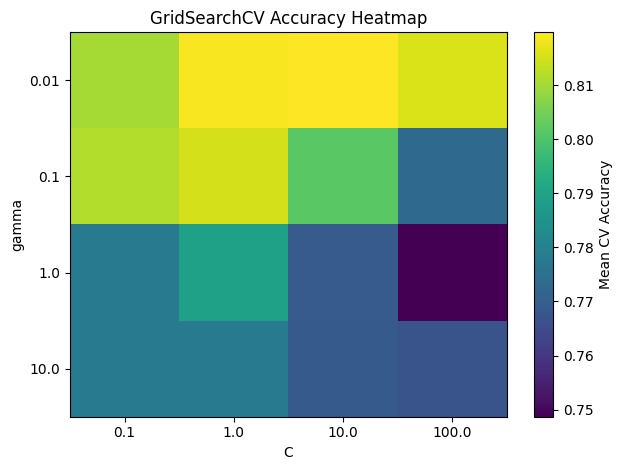

In [11]:
# 1) Pull results into a DataFrame
results = pd.DataFrame(grid.cv_results_)

# 2) Pivot so rows=gamma, cols=C, values=mean score
pivot = results.pivot(
    index='param_gamma',
    columns='param_C',
    values='mean_test_score'
)

# 3) Plot it
plt.figure()
plt.imshow(pivot, aspect='auto')            # image of the 2D array
plt.colorbar(label='Mean CV Accuracy')      # side bar

# 4) Label ticks
plt.xticks(np.arange(len(pivot.columns)), pivot.columns)
plt.yticks(np.arange(len(pivot.index)),      pivot.index)

plt.xlabel('C')
plt.ylabel('gamma')
plt.title('GridSearchCV Accuracy Heatmap')
plt.tight_layout()
plt.show()

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      5840
           1       0.68      0.32      0.43      1643

    accuracy                           0.82      7483
   macro avg       0.76      0.64      0.66      7483
weighted avg       0.80      0.82      0.79      7483

Confusion Matrix:
 [[5593  247]
 [1122  521]]
SVM ROC AUC: 0.714


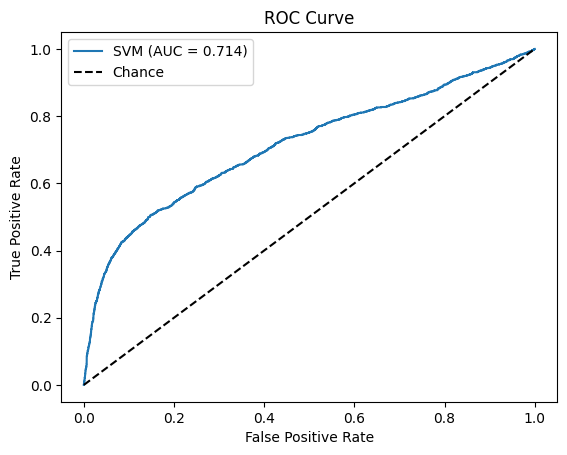

In [6]:
# 4) Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC / AUC
auc = roc_auc_score(y_test, y_proba)
fpr, tpr, _ = roc_curve(y_test, y_proba)
print(f"SVM ROC AUC: {auc:.3f}")

plt.figure()
plt.plot(fpr, tpr, label=f"SVM (AUC = {auc:.3f})")
plt.plot([0,1], [0,1], 'k--', label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()